In [1]:
import numpy as np
import os
from pymatgen.io.vasp import Poscar
structure = Poscar.from_file('../POSCAR').structure
print(structure.composition)
coords = np.array(structure.frac_coords[:67+41,:])+np.array([1/6,0,0])
for k in range(len(coords)):
    structure.append("F",coords[k])
from site_analysis.atom import atoms_from_species_string
atoms = atoms_from_species_string(Poscar.from_file('../POSCAR').structure, 'F')
from pymatgen.io.vasp import Poscar, Xdatcar
import numpy as np
import operator
from site_analysis.polyhedral_site import PolyhedralSite
from site_analysis.atom import atoms_from_species_string
from site_analysis.trajectory import Trajectory
from site_analysis.tools import get_vertex_indices
#all_na_structure = Poscar.from_file('/Users/swc57/200626ICETPHENIX/RESTART/STSQS2/r1/POSCAR').structure
all_na_structure = structure
vertex_species = ['Ba',"Sn"]
centre_species = 'F'
all_na_structure.composition
# find atom indices (within species) for all polyhedra vertex atoms
vertex_indices = np.array(get_vertex_indices(structure, centre_species=centre_species, 
                                             vertex_species=vertex_species, cutoff=4.3))
print(vertex_indices[:4])
# Our real structures contain 88 Na atoms, so we correct these vertex indices
vertex_indices = vertex_indices
print(vertex_indices[:4])
sites = PolyhedralSite.sites_from_vertex_indices(vertex_indices)
trajectory = Trajectory(sites=sites,
                        atoms=atoms)
trajectory
trajectory.reset()
from tqdm import tqdm
structures = []
for i in tqdm(range(1,54)):
    xdatcar = Xdatcar(f'trajectories/r{i}/XDATCAR')
    structures.extend(xdatcar.structures)
for timestep, s in tqdm(enumerate(structures)):
    trajectory.append_timestep(s, t=timestep)

Ba54 Sn54 F216


/Users/swc57/miniconda3/envs/p3p7/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[list([4, 1, 2, 55]) list([58, 1, 3, 60]) list([69, 2, 3, 21])
 list([55, 60, 21, 80])]
[list([4, 1, 2, 55]) list([58, 1, 3, 60]) list([69, 2, 3, 21])
 list([55, 60, 21, 80])]


100%|███████████████████████████████████████████| 53/53 [02:51<00:00,  3.23s/it]
15900it [27:40,  9.58it/s]


In [39]:
from figure_formatting import figure_formatting as ff

ff.set_formatting()

In [40]:
ntins=[]
for site in sites:
    ntins.append(np.sum(np.array(site.get_vertex_species(all_na_structure))=='Sn'))

In [41]:
trajectories=[]
hops=[]
for k in range(108,324):
    print("now")
    buf_list=[]
    buffer=trajectory.atom_by_index(k).trajectory
    count =0
    for item in buffer:

            if count == 0:
                count +=1
                buf_list.append(item)
            elif type(item)!=int:
                pass
            elif buf_list[-1]==item:
                pass
            else:
                count +=1
                buf_list.append(item)

    trajectories.append(np.array(buf_list))
    hops.append(count-1)


now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now
now


In [42]:
site_numbers=[]
ntins=np.array(ntins)
for atoms in trajectories:
    buffer=[]
    for ats in atoms:
        buffer.append(ntins[ats])
    site_numbers.append(buffer)


In [43]:
ntins_tot=np.array(ntins)
ntins_tot[216:]+=10

In [44]:
hop_dimensionality=[]
forward_dimensionality=[]
shoto_dimensionality=[]
shoto_forward_dimensionality=[]
hop_along=[]
linear=[]
shoto=[]
alles=0

for line in trajectories[-1000:]:
    last=1000
    prior=1000
    nb=[]
    nf=[]
    shoto=[]
    shoto_forward=[]
    hop_along.append(len(np.unique(line)))
    linear.append(np.sum(np.unique(line)<1111))
    for element in line:
        if element is not None:
            if element < 111111:
                print(element)
                if len(nb)==0:
                    nb.append(ntins_tot[element])
                    shoto.append(element)
                    prior=last
                    last=element
                elif last!=element:
                    shoto.append(element)
                    echo=element
                    if element >216:
                        nb.append(ntins_tot[element])
                        prior=last
                        last=element
                    else:
                        if prior!= element:
                            nb.append(ntins_tot[element])
                            nf.append(nb[-2])
                            nf.append(nb[-1])
                            shoto_forward.append(shoto[-2])
                            shoto_forward.append(shoto[-1])
                            prior=last
                            last=element
                        else:
                            nb.append(ntins_tot[element])
                            prior=last
                            last=element
    hop_dimensionality.append([nb])
    forward_dimensionality.append([nf])
    shoto_dimensionality.append([shoto])
    shoto_forward_dimensionality.append([shoto_forward])


    alles+=np.sum(np.unique(line)<216)-1
    linear.append(np.unique(line)<216)

0
217
0
217
0
217
0
220
0
217
0
220
0
257
0
217
0
217
0
257
0
257
0
217
0
217
0
257
0
257
0
217
0
217
0
220
0
217
0
217
0
217
0
217
0
220
0
217
0
220
0
257
0
220
0
217
0
217
0
217
0
217
0
217
0
217
0
220
0
1
274
1
256
1
274
1
256
1
256
1
256
1
256
1
256
1
256
1
256
1
256
1
256
1
256
1
259
1
274
1
274
1
274
1
274
1
274
22
274
22
274
22
274
22
274
22
317
22
274
22
317
22
274
22
274
22
317
22
274
22
274
22
274
22
274
22
256
22
274
22
274
22
274
22
222
22
274
22
274
22
274
22
274
22
274
22
274
22
274
22
317
22
317
22
274
40
317
40
317
40
274
40
317
22
317
22
317
164
317
186
317
186
317
186
317
186
316
186
317
164
316
164
317
164
317
186
316
186
316
186
317
186
317
186
317
186
317
186
316
186
262
186
262
186
262
186
262
186
318
186
262
186
262
186
316
181
260
181
260
181
261
181
261
181
261
181
260
181
260
181
260
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
261
181
318
181
318
181

306
152
306
157
306
157
308
157
311
157
311
162
311
162
311
157
311
157
311
157
311
157
311
157
311
157
311
157
311
162
311
162
311
162
311
162
308
157
311
162
308
162
308
162
309
162
308
162
309
162
309
162
311
162
311
162
311
164
311
155
316
155
306
155
306
155
306
155
306
155
306
155
306
155
306
155
311
155
316
155
311
155
306
155
311
155
316
155
316
155
316
155
316
155
316
155
316
155
311
155
311
155
311
164
311
164
311
164
311
164
316
155
261
155
316
155
316
155
316
155
316
155
316
186
316
186
317
186
317
186
317
186
316
186
317
186
316
186
317
186
317
186
317
186
317
186
317
186
317
186
317
47
317
47
317
47
318
47
318
47
318
47
318
47
318
47
318
47
317
47
318
32
318
32
318
32
278
32
318
32
318
32
318
32
318
32
318
32
318
32
318
32
318
32
318
32
318
32
318
32
318
32
318
32
318
32
318
32
278
32
318
32
318
32
278
32
278
32
278
32
278
32
278
32
261
178
261
178
261
178
261
32
278
39
278
32
278
32
278
32
278
32
278
32
278
32
278
32
278
32
278
32
278
32
278
32
318
32
278
32
278
39
224
3

In [45]:
forth_co=[]
forth_mean=[]
for line in forward_dimensionality:
    forth_co.append(len(line[0]))
    cococo=np.array(line[0]+[0])
    forth_mean.append(np.mean(np.array(cococo[cococo<5])))

In [46]:
import matplotlib.pyplot as plt

In [47]:
toccupancy=[]
letoc=[]
for line in trajectory.at:
   lol= np.array(line)
   lol=lol[lol > 216]
   toccupancy.append(ntins[lol])
   letoc.append(len(toccupancy[-1]))
tettoccupancy=[]
tetletoc=[]
for line in trajectory.at:
   lol= np.array(line)
   lol=lol[lol < 216]
   tettoccupancy.append(ntins[lol])
   tetletoc.append(len(toccupancy[-1]))
lin_toccupancy=[]
for line in toccupancy:
    lin_toccupancy.extend(line)
tetlin_toccupancy=[]
for line in tettoccupancy:
    tetlin_toccupancy.extend(line)
tist=np.histogram(ntins[:216],bins=np.arange(-.5,4.51,1),density=True)
oist=np.histogram(np.array(tetlin_toccupancy).ravel(),bins=np.arange(-.5,4.51,1),density=True)

In [48]:
tetrahedral_occupancy=len(tetlin_toccupancy)/15900/216

0.049078926935321066
0.137364508113984
0.16718281698889662
0.07463991769547325
0.002032572404689805


/Users/swc57/miniconda3/envs/p3p7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  


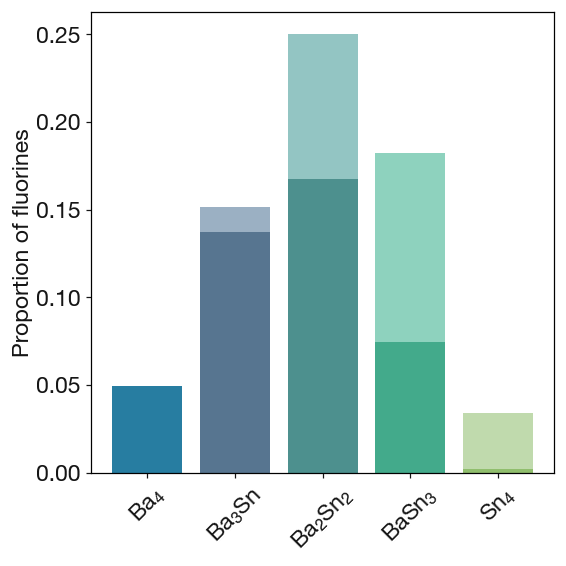

In [49]:
fig, ax =plt.subplots(figsize=(4.5,4.5))
colorlist=['#277DA1','#577590','#4D908E','#43AA8B','#90BE6D']
colorlist_unoc=['#70BCDC','#9BB0C3','#93C5C3','#8ED2BE','#C0DAAD']
oc=[]
unoc=[]
for n in range(5):
    plt.bar((np.array(tist[1])[:-1][n]+np.array(tist[1])[1:][n])/2,tist[0][n]/3*2,color=colorlist_unoc[n])
    unoc.append(tist[0][n]/3*2)
    print(oist[0][n]*tetrahedral_occupancy/3*2)
    plt.bar((np.array(oist[1])[:-1][n]+np.array(oist[1])[1:][n])/2,oist[0][n]*tetrahedral_occupancy/3*2,color=colorlist[n],label='Occupancy')
    oc.append(oist[0][n]*tetrahedral_occupancy/3*2)
ax.set_xticks([0,1,2,3,4],['Ba$_{4}$','Ba$_{3}$Sn','Ba$_{2}$Sn$_{2}$','BaSn$_{3}$','Sn$_{4}$'],rotation=45,fontsize=13)
ax.tick_params(axis='y',labelsize=13)
plt.tight_layout(pad=50)
plt.subplots_adjust(bottom=0.2)
plt.ylabel("Proportion of fluorines", fontsize=13)
plt.ylim(0)
plt.tight_layout()
plt.savefig("new_occupancies.pdf")

In [50]:
tistD=np.histogram(ntins[:216],bins=np.arange(-.5,4.51,1))
oistD=np.histogram(np.array(tetlin_toccupancy).ravel(),bins=np.arange(-.5,4.51,1))

tet_base=oistD[0]/tistD[0]/14176

tistDoct=np.histogram(ntins[216:],bins=np.arange(-.5,6.51,1))
oistDoct=np.histogram(np.array(lin_toccupancy).ravel(),bins=np.arange(-.5,6.51,1))

oct_base=oistDoct[0]/tistDoct[0]/14176

/Users/swc57/miniconda3/envs/p3p7/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  if __name__ == "__main__":


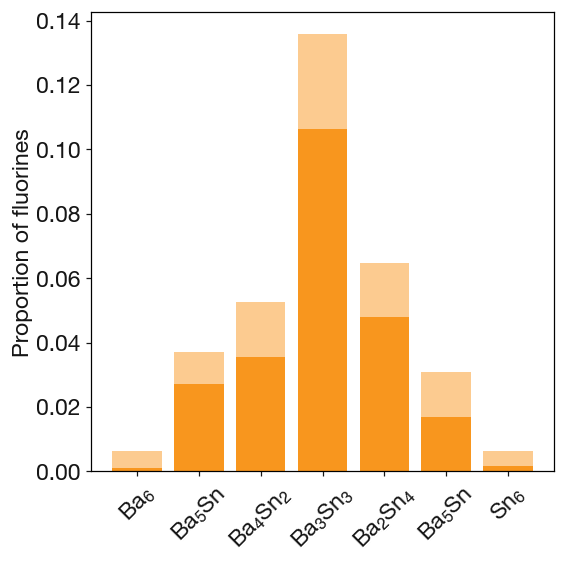

In [51]:
tist=np.histogram(ntins[216:],bins=np.arange(-.5,6.51,1),density=True)
oist=np.histogram(np.array(lin_toccupancy).ravel(),bins=np.arange(-.5,6.51,1),density=True)
fig, ax =plt.subplots(figsize=(4.5,4.5))


plt.bar((np.array(tist[1])[:-1]+np.array(tist[1])[1:])/2,tist[0]/3,color='#FCCB90',label='Sites')
plt.bar((np.array(oist[1])[:-1]+np.array(oist[1])[1:])/2,oist[0]*(1-tetrahedral_occupancy)/3*2,color='#F8961E',label='Occupancy')
ax.set_xticks([0,1,2,3,4],['FBa$_{4}$','FBa$_{3}$Sn','FBa$_{2}$Sn$_{2}$','FBaSn$_{3}$','FSn$_{4}$'],rotation=45,fontsize=13)
plt.tight_layout(pad=50)
plt.subplots_adjust(bottom=0.2)
ax.tick_params(axis='y',labelsize=13)
plt.ylabel("Proportion of fluorines", fontsize=13)

ax.set_xticks([0,1,2,3,4,5,6],['Ba$_{6}$','Ba$_{5}$Sn','Ba$_{4}$Sn$_{2}$','Ba$_{3}$Sn$_{3}$','Ba$_{2}$Sn$_{4}$','Ba$_{5}$Sn','Sn$_{6}$'],rotation=45,fontsize=13)

plt.tight_layout()
plt.savefig("new_occupancies_oct.pdf")

In [52]:
for kount in range(len(tist[0]/3)):
    unoc.append((tist[0]/3)[kount])
    oc.append((oist[0]*(1-tetrahedral_occupancy)/3*2)[kount])

In [91]:
ocurrances=np.histogram(np.array(trajectory.at).ravel(),bins=np.arange(-.5,324.5,1))[0]
en_pops=np.log(ocurrances/len(structures)/216)*600*8.617e-5*-1
line=np.log(np.sort(ocurrances)[int(324/3)]/len(structures)/216)*600*8.617e-5*-1-np.min(en_pops)
en_pops-=np.min(en_pops)

In [92]:
line

0.03206630412760586

In [93]:
tet_tins=np.array(ntins)[:216]
oct_tins=np.array(ntins)[216:]

In [94]:

tet_0_oc = ocurrances[np.where([tet_tins==0])[1]]
tet_1_oc = ocurrances[np.where([tet_tins==1])[1]]
tet_2_oc = ocurrances[np.where([tet_tins==2])[1]]
tet_3_oc = ocurrances[np.where([tet_tins==3])[1]]
tet_4_oc = ocurrances[np.where([tet_tins==4])[1]]


oct_0_oc = ocurrances[216+np.where([oct_tins==0])[1]]
oct_1_oc = ocurrances[216+np.where([oct_tins==1])[1]]
oct_2_oc = ocurrances[216+np.where([oct_tins==2])[1]]
oct_3_oc = ocurrances[216+np.where([oct_tins==3])[1]]
oct_4_oc = ocurrances[216+np.where([oct_tins==4])[1]]
oct_5_oc = ocurrances[216+np.where([oct_tins==5])[1]]
oct_6_oc = ocurrances[216+np.where([oct_tins==6])[1]]


In [95]:

tet_0_en = en_pops[np.where([tet_tins==0])[1]]
tet_1_en = en_pops[np.where([tet_tins==1])[1]]
tet_2_en = en_pops[np.where([tet_tins==2])[1]]
tet_3_en = en_pops[np.where([tet_tins==3])[1]]
tet_4_en = en_pops[np.where([tet_tins==4])[1]]


oct_0_en = en_pops[216+np.where([oct_tins==0])[1]]
oct_1_en = en_pops[216+np.where([oct_tins==1])[1]]
oct_2_en = en_pops[216+np.where([oct_tins==2])[1]]
oct_3_en = en_pops[216+np.where([oct_tins==3])[1]]
oct_4_en = en_pops[216+np.where([oct_tins==4])[1]]
oct_5_en = en_pops[216+np.where([oct_tins==5])[1]]
oct_6_en = en_pops[216+np.where([oct_tins==6])[1]]

oct_all_en = en_pops[216:]

In [96]:
from scipy.stats import gaussian_kde


In [97]:
x = np.linspace(-.1,.5,10000)

density=gaussian_kde(oct_all_en,bw_method=.5)
print(density.covariance_factor())
y=density(x)
density=gaussian_kde(tet_0_en,bw_method=.5)
                     
yt0=density(x)
print(density.covariance_factor())

density=gaussian_kde(tet_1_en,bw_method=.5)
yt1=density(x)
density=gaussian_kde(tet_2_en,bw_method=.5)
yt2=density(x)
density=gaussian_kde(tet_3_en,bw_method=.5)
yt3=density(x)
density=gaussian_kde(tet_4_en,bw_method=.5)
yt4=density(x)

0.5
0.5


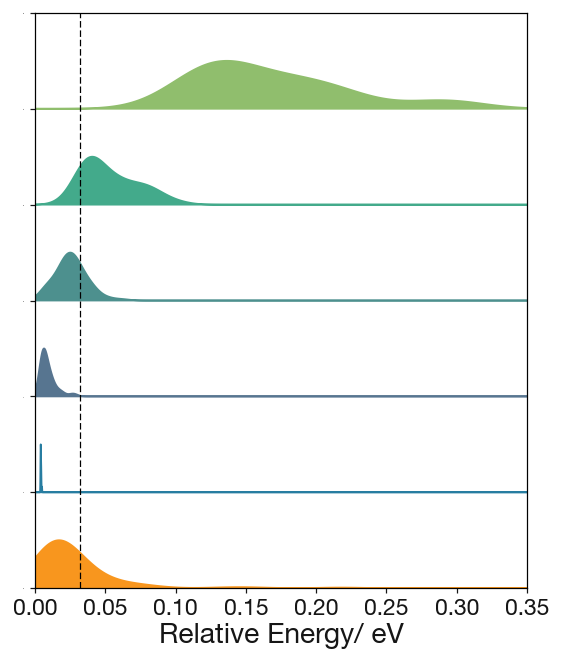

In [98]:
fig, ax =plt.subplots(figsize=(5,6))

plt.fill_between(x,yt4/np.max(yt4)+10,10,color=colorlist[4])
plt.fill_between(x,yt3/np.max(yt3)+8,8,color=colorlist[3])
plt.fill_between(x,yt2/np.max(yt2)+6,6,color=colorlist[2])
plt.fill_between(x,yt1/np.max(yt1)+4,4,color=colorlist[1])
plt.fill_between(x,yt0/np.max(yt0)+2,2,color=colorlist[0])
plt.xlim(-0,.35)
plt.ylim(0,12)
ax.tick_params(axis='x',labelsize=13)

ax.tick_params(axis='y',labelsize=0)

plt.plot([line,line],[0,12],linestyle='dashed',color='black')
plt.fill_between(x,y/np.max(y),color='#F8961E')
plt.xlabel("Relative Energy/ eV", fontsize=16)
plt.savefig("statistical_mechanical_band_structure.pdf")

In [99]:
hop_to=[]
hop_from=[]
for looper in hop_dimensionality:
    line=looper[0]
    print(len(line))
    if len(line)>1:
        hop_to.extend(line[1:])
        hop_from.extend(line[:-1])

69
352
49
477
398
217
279
11
299
260
369
374
280
358
166
383
3
188
197
129
81
45
68
191
255
291
460
375
543
496
303
430
359
402
548
161
397
380
333
262
428
17
17
166
49
244
74
194
200
33
100
135
77
56
27
285
96
149
352
192
294
404
329
319
119
39
45
156
35
87
26
17
395
284
204
296
178
255
374
156
448
307
419
431
645
486
432
472
376
342
205
180
137
136
462
109
536
388
426
345
497
531
362
296
435
322
382
355
271
536
187
474
242
311
372
229
370
310
183
280
391
301
215
412
341
337
278
128
407
327
343
552
231
335
317
409
104
29
407
208
132
349
176
285
317
67
5
20
325
5
203
107
470
284
158
231
17
267
317
498
465
376
312
161
471
75
320
369
346
408
466
213
334
222
362
387
388
334
448
244
150
458
339
284
365
175
203
361
407
348
493
365
180
275
49
7
11
73
286
194
196
306
117
422
340
89
293
253
184
170
196
171
101
233
263
497


In [100]:
forth_to=[]
forth_from=[]
for looper in forward_dimensionality:
    line=looper[0]
    print(len(line))
    if len(line)>1:
        forth_to.extend(line[1:])
        forth_from.extend(line[:-1])

0
28
2
66
66
12
22
0
80
56
56
60
56
60
32
42
0
14
18
14
0
6
4
36
28
44
62
98
92
62
34
90
48
58
98
28
64
100
54
34
84
0
0
18
0
22
8
24
12
8
0
20
14
8
0
56
6
16
56
22
72
64
78
50
6
0
0
16
0
0
2
0
20
50
14
30
20
28
48
32
80
42
72
118
224
114
88
70
52
58
34
14
10
14
88
2
94
84
58
54
106
100
54
46
34
54
74
58
38
128
66
116
30
90
64
60
58
40
6
54
88
24
26
66
16
48
34
6
80
36
88
138
44
46
46
42
6
0
118
2
32
54
10
42
36
14
0
0
52
0
26
12
84
44
34
32
0
54
38
48
62
54
68
10
30
0
46
100
88
78
140
46
68
30
92
36
70
62
62
24
12
78
20
54
60
28
22
34
28
66
60
62
34
38
2
0
0
0
62
30
22
26
6
100
70
4
84
40
10
28
42
28
14
54
52
122


/Users/swc57/miniconda3/envs/p3p7/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  # Remove the CWD from sys.path while we load stuff.


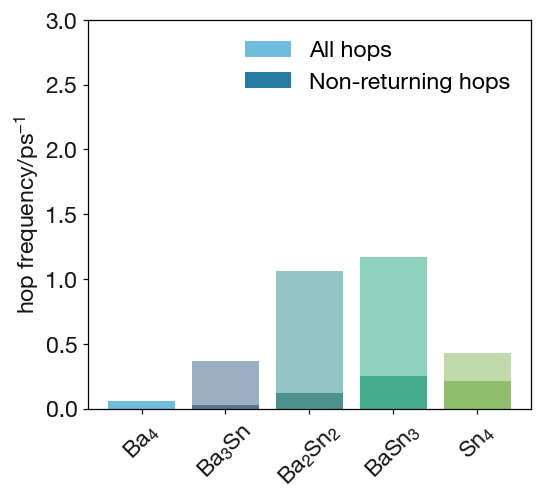

In [101]:
fig, ax =plt.subplots(figsize=(4.5,4.5))
colorlist=['#277DA1','#577590','#4D908E','#43AA8B','#90BE6D']
colorlist_unoc=['#70BCDC','#9BB0C3','#93C5C3','#8ED2BE','#C0DAAD']
for n in range(5):
    plt.bar([0,1,2,3,4][n],(np.histogram(hop_from,bins=[-.5,.5,1.5,2.5,3.5,4.5])[0]/np.histogram(ntins[:216],bins=[-.5,.5,1.5,2.5,3.5,4.5])[0]/(16200*10/1000))[n],color=colorlist_unoc[n])
    plt.bar([0,1,2,3,4][n],(np.histogram(forth_from,bins=[-.5,.5,1.5,2.5,3.5,4.5])[0]/np.histogram(ntins[:216],bins=[-.5,.5,1.5,2.5,3.5,4.5])[0]/(16200*10/1000))[n],color=colorlist[n])
plt.ylabel('hop frequency/ps$^{-1}$',fontsize=13)
ax.legend(['All hops','Non-returning hops'],fontsize=13)
ax.set_xticks([0,1,2,3,4],['FBa$_{4}$','FBa$_{3}$Sn','FBa$_{2}$Sn$_{2}$','FBaSn$_{3}$','FSn$_{4}$'])#,rotation=45,fontsize=13)
plt.tight_layout(pad=50)
plt.ylim(-0.0,3)
plt.subplots_adjust(bottom=0.2)
ax.set_xticks([0,1,2,3,4],['Ba$_{4}$','Ba$_{3}$Sn','Ba$_{2}$Sn$_{2}$','BaSn$_{3}$','Sn$_{4}$'],rotation=45,fontsize=13)
ax.tick_params(axis='y',labelsize=13)
plt.savefig('Hops_tet.pdf')


/Users/swc57/miniconda3/envs/p3p7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  import sys


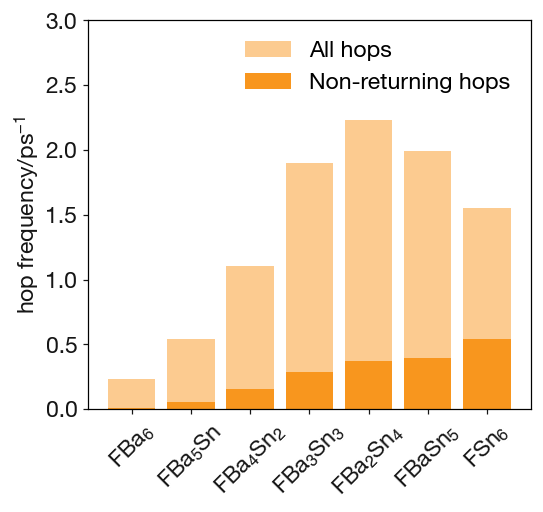

In [102]:
fig, ax =plt.subplots(figsize=(4.5,4.5))
plt.bar([0,1,2,3,4,5,6],np.histogram(hop_from,bins=np.array([-.5,.5,1.5,2.5,3.5,4.5,5.5,6.5])+10)[0]/np.histogram(ntins[216:],bins=np.array([-.5,.5,1.5,2.5,3.5,4.5,5.5,6.5]))[0]/(16200*10/1000),color='#FCCB90')
plt.bar([0,1,2,3,4,5,6],np.histogram(forth_from,bins=np.array([-.5,.5,1.5,2.5,3.5,4.5,5.5,6.5])+10)[0]/np.histogram(ntins[216:],bins=np.array([-.5,.5,1.5,2.5,3.5,4.5,5.5,6.5]))[0]/(16200*10/1000),color='#F8961E')
plt.ylabel('hop frequency/ps$^{-1}$',fontsize=13)
ax.legend(['All hops','Non-returning hops'],fontsize=13)
ax.set_xticks([0,1,2,3,4],['FBa$_{4}$','FBa$_{3}$Sn','FBa$_{2}$Sn$_{2}$','FBaSn$_{3}$','FSn$_{4}$'])#,rotation=45,fontsize=13)
plt.tight_layout(pad=50)
plt.ylim(0,3)
plt.subplots_adjust(bottom=0.2)
ax.set_xticks([0,1,2,3,4,5,6],['FBa$_{6}$','FBa$_{5}$Sn','FBa$_{4}$Sn$_{2}$','FBa$_{3}$Sn$_{3}$','FBa$_{2}$Sn$_{4}$','FBaSn$_{5}$','FSn$_{6}$'],rotation=45,fontsize=13)
ax.tick_params(axis='y',labelsize=13)
plt.ylim(0,3)
plt.ylabel('hop frequency/ps$^{-1}$',fontsize=13)
plt.subplots_adjust(bottom=0.2)

plt.savefig('Hops_oct.pdf')


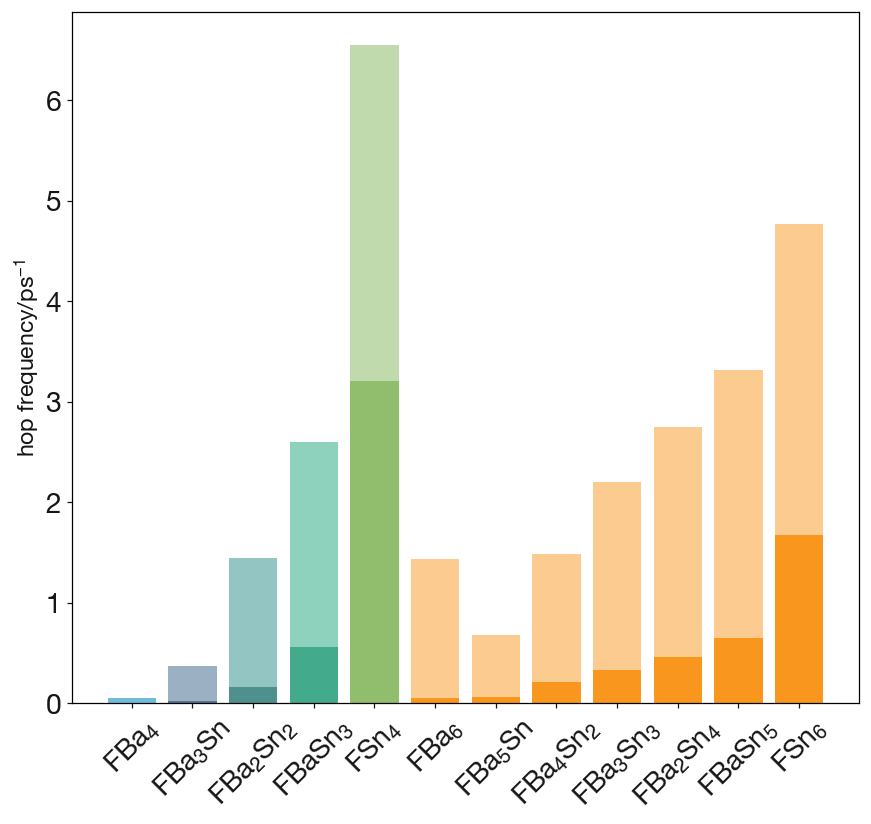

In [103]:
fig, ax =plt.subplots(figsize=(8,8))
colorlist=['#277DA1','#577590','#4D908E','#43AA8B','#90BE6D']
colorlist_unoc=['#70BCDC','#9BB0C3','#93C5C3','#8ED2BE','#C0DAAD']
weight_list=np.append(tet_base,oct_base)
for n in range(5):
    plt.bar([0,1,2,3,4][n],(np.histogram(hop_from,bins=[-.5,.5,1.5,2.5,3.5,4.5])[0]/np.histogram(ntins[:216],bins=[-.5,.5,1.5,2.5,3.5,4.5])[0])[n]/weight_list[n]/(15900*10/1000),color=colorlist_unoc[n])
    plt.bar([0,1,2,3,4][n],(np.histogram(forth_from,bins=[-.5,.5,1.5,2.5,3.5,4.5])[0]/np.histogram(ntins[:216],bins=[-.5,.5,1.5,2.5,3.5,4.5])[0])[n]/weight_list[n]/(15900*10/1000),color=colorlist[n])
plt.bar([0+5,1+5,2+5,3+5,4+5,5+5,6+5],np.histogram(hop_from,bins=np.array([-.5,.5,1.5,2.5,3.5,4.5,5.5,6.5])+10)[0]/np.histogram(ntins[216:],bins=np.array([-.5,.5,1.5,2.5,3.5,4.5,5.5,6.5]))[0]/weight_list[5:]/(15900*10/1000),color='#FCCB90')
plt.bar([0+5,1+5,2+5,3+5,4+5,5+5,6+5],np.histogram(forth_from,bins=np.array([-.5,.5,1.5,2.5,3.5,4.5,5.5,6.5])+10)[0]/np.histogram(ntins[216:],bins=np.array([-.5,.5,1.5,2.5,3.5,4.5,5.5,6.5]))[0]/weight_list[5:]/(15900*10/1000),color='#F8961E')
plt.ylabel('hop frequency/ps$^{-1}$',fontsize=16)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],['FBa$_{4}$','FBa$_{3}$Sn','FBa$_{2}$Sn$_{2}$','FBaSn$_{3}$','FSn$_{4}$','FBa$_{6}$','FBa$_{5}$Sn','FBa$_{4}$Sn$_{2}$','FBa$_{3}$Sn$_{3}$','FBa$_{2}$Sn$_{4}$','FBaSn$_{5}$','FSn$_{6}$'],rotation=45,fontsize=16)
ax.tick_params(axis='y',labelsize=16)
plt.ylabel('hop frequency/ps$^{-1}$',fontsize=13)
plt.subplots_adjust(bottom=0.2)
plt.savefig("hops_new.pdf",dpi=300)

In [106]:
hexamin_loc=np.loadtxt('../Polarisation/hexamin_loc')

OSError: ../Polarisation/hexamin_loc not found.

In [105]:
store= np.zeros((54*2,6))
for count in range(108*2):
    diffblock=sites[count].centre()-sites[count].vertex_coords
    vi=sites[count].vertex_indices
    diffblock*=-np.abs(diffblock)<.1
    diffblock=(((np.sign(diffblock)+1)/2)*np.array([1,1,1])+np.array([0,2,4]))
    nt=ntins[count]
    for val in range(4):
        for l in diffblock[val,:]:
            store[vi[val],int(l)]+=nt
            print(nt,val)

1 0
1 0
1 0
1 1
1 1
1 1
1 2
1 2
1 2
1 3
1 3
1 3
2 0
2 0
2 0
2 1
2 1
2 1
2 2
2 2
2 2
2 3
2 3
2 3
1 0
1 0
1 0
1 1
1 1
1 1
1 2
1 2
1 2
1 3
1 3
1 3
3 0
3 0
3 0
3 1
3 1
3 1
3 2
3 2
3 2
3 3
3 3
3 3
2 0
2 0
2 0
2 1
2 1
2 1
2 2
2 2
2 2
2 3
2 3
2 3
2 0
2 0
2 0
2 1
2 1
2 1
2 2
2 2
2 2
2 3
2 3
2 3
2 0
2 0
2 0
2 1
2 1
2 1
2 2
2 2
2 2
2 3
2 3
2 3
0 0
0 0
0 0
0 1
0 1
0 1
0 2
0 2
0 2
0 3
0 3
0 3
3 0
3 0
3 0
3 1
3 1
3 1
3 2
3 2
3 2
3 3
3 3
3 3
2 0
2 0
2 0
2 1
2 1
2 1
2 2
2 2
2 2
2 3
2 3
2 3
4 0
4 0
4 0
4 1
4 1
4 1
4 2
4 2
4 2
4 3
4 3
4 3
3 0
3 0
3 0
3 1
3 1
3 1
3 2
3 2
3 2
3 3
3 3
3 3
4 0
4 0
4 0
4 1
4 1
4 1
4 2
4 2
4 2
4 3
4 3
4 3
3 0
3 0
3 0
3 1
3 1
3 1
3 2
3 2
3 2
3 3
3 3
3 3
3 0
3 0
3 0
3 1
3 1
3 1
3 2
3 2
3 2
3 3
3 3
3 3
2 0
2 0
2 0
2 1
2 1
2 1
2 2
2 2
2 2
2 3
2 3
2 3
0 0
0 0
0 0
0 1
0 1
0 1
0 2
0 2
0 2
0 3
0 3
0 3
2 0
2 0
2 0
2 1
2 1
2 1
2 2
2 2
2 2
2 3
2 3
2 3
1 0
1 0
1 0
1 1
1 1
1 1
1 2
1 2
1 2
1 3
1 3
1 3
1 0
1 0
1 0
1 1
1 1
1 1
1 2
1 2
1 2
1 3
1 3
1 3
1 0
1 0
1 0
1 1
1 1
1 1
1 2
1 2
1 2
1 3


In [176]:
store= np.zeros((54*2,6))
for count in range(108*2):
    diffblock=sites[count].centre()-sites[count].vertex_coords
    vi=sites[count].vertex_indices
    diffblock*=-np.abs(diffblock)<.1
    diffblock=(((np.sign(diffblock)+1)/2)*np.array([1,1,1])+np.array([0,2,4]))
    nt=ntins[count]
    for val in range(3):
        set_block=(np.sum((diffblock==val),axis=1)==0)
        print(set_block)
        for l in range(len(set_block)):
            if set_block[l]==False:
                
                store[vi[l],val]+=np.sum(np.sum((diffblock==val),axis=1)*np.array(vi)>54)-1
                print(nt,val)

[ True  True False False]
1 0
1 0
[False False  True  True]
1 1
1 1
[ True False  True False]
1 2
1 2
[ True  True False False]
2 0
2 0
[False False  True  True]
2 1
2 1
[False  True  True False]
2 2
2 2
[False  True  True False]
1 0
1 0
[ True False False  True]
1 1
1 1
[ True  True False False]
1 2
1 2
[ True  True False False]
3 0
3 0
[False False  True  True]
3 1
3 1
[ True False  True False]
3 2
3 2
[ True False  True False]
2 0
2 0
[False  True False  True]
2 1
2 1
[ True False False  True]
2 2
2 2
[ True False  True False]
2 0
2 0
[False  True False  True]
2 1
2 1
[ True  True False False]
2 2
2 2
[ True  True False False]
2 0
2 0
[False False  True  True]
2 1
2 1
[ True False  True False]
2 2
2 2
[ True  True False False]
0 0
0 0
[False False  True  True]
0 1
0 1
[ True False  True False]
0 2
0 2
[ True  True False False]
3 0
3 0
[False False  True  True]
3 1
3 1
[ True False  True False]
3 2
3 2
[ True  True False False]
2 0
2 0
[False False  True  True]
2 1
2 1
[ True False F

In [150]:
(np.sum((diffblock==val),axis=1)==0)

array([False,  True,  True, False])

In [155]:
np.sum((diffblock==val),axis=1)*np.array(vi)>54

array([1, 0, 0, 1])

In [107]:
np.sum((diffblock==2),axis=1)

array([0, 1, 0, 1])

In [108]:
np.array(vi)<54

array([False, False,  True, False])

In [119]:
(np.sum((diffblock==4),axis=1)!=0)*np.array(vi)>54

array([False,  True, False, False])

In [60]:
np.array(vi)<54!=0

(498, 54)

In [332]:
hex_block=[]
total_block=[]
for k in range(54):
    hex_block.append(np.histogram(hexamin_loc[:,k],bins=np.arange(0,6.1,1),density=True)[0])
    total_block.append(store[k,:]/np.sum(store[k,:]))

In [361]:
store2=np.zeros(np.shape(store))
store2[:,1]=store[:,0]
store2[:,0]=store[:,1]
store2[:,2]=store[:,3]
store2[:,3]=store[:,2]
store2[:,4]=store[:,5]
store2[:,5]=store[:,4]

In [362]:
vals=np.zeros((5,5))
counting_base=np.zeros((5,5))
hex_block=np.array(hex_block)
for k in range(np.shape(hex_block)[0]):
    for l in range(np.shape(hex_block)[1]):
        vals[int(store[k,l]),int(store2[k,l])]+=hex_block[k,l]
        counting_base[int(store[k,l]),int(store2[k,l])]+=1

/Users/swc57/miniconda3/envs/p3p7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


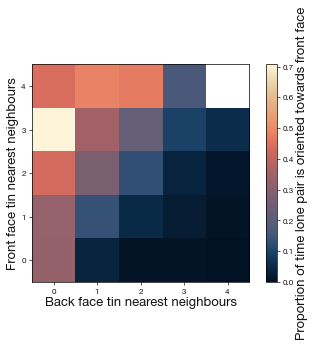

In [392]:
from cmcrameri import cm
plt.figure()
plt.imshow(vals/counting_base,cmap=cm.lipari,vmin=0)
plt.xlim(-0.5,4.5)
plt.ylim(-0.5,4.5)
plt.xlabel('Back face tin nearest neighbours',fontsize=13)
plt.ylabel('Front face tin nearest neighbours',fontsize=13)
cbar=plt.colorbar()
cbar.set_label('Proportion of time lone pair is oriented towards front face',fontsize=13)
plt.savefig("orientation.pdf")

In [387]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the Axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or 

In [322]:
np.sum(vals)

53.99999999999999

In [302]:
store[-1]

array([1., 3., 3., 1., 2., 2.])

In [164]:
np.max(store)

4.0

In [180]:
store

array([[-4., -4., -3.,  0.,  0.,  0.],
       [-3., -3., -3.,  0.,  0.,  0.],
       [-2., -2., -2.,  0.,  0.,  0.],
       [-3., -3., -4.,  0.,  0.,  0.],
       [-4., -4., -3.,  0.,  0.,  0.],
       [-2., -2., -1.,  0.,  0.,  0.],
       [-1., -1., -2.,  0.,  0.,  0.],
       [-2., -2., -2.,  0.,  0.,  0.],
       [-2., -2., -2.,  0.,  0.,  0.],
       [-1., -1., -1.,  0.,  0.,  0.],
       [-1., -1., -1.,  0.,  0.,  0.],
       [-2., -2., -1.,  0.,  0.,  0.],
       [-2., -2., -3.,  0.,  0.,  0.],
       [-2., -2., -3.,  0.,  0.,  0.],
       [-2., -2., -1.,  0.,  0.,  0.],
       [-2., -2., -3.,  0.,  0.,  0.],
       [-3., -3., -3.,  0.,  0.,  0.],
       [-3., -3., -3.,  0.,  0.,  0.],
       [-2., -2., -2.,  0.,  0.,  0.],
       [-2., -2., -2.,  0.,  0.,  0.],
       [-3., -3., -3.,  0.,  0.,  0.],
       [ 0.,  0., -2.,  0.,  0.,  0.],
       [ 0.,  0., -2.,  0.,  0.,  0.],
       [-2., -2., -3.,  0.,  0.,  0.],
       [-2., -2., -1.,  0.,  0.,  0.],
       [-2., -2., -2.,  0

In [182]:
from pymatgen.core import Structure, Lattice
from polyhedral_analysis.configuration import Configuration
from polyhedral_analysis.polyhedra_recipe import PolyhedraRecipe
from polyhedral_analysis.octahedral_analysis import isomer_is_cis, isomer_is_fac, isomer_is_mer, isomer_is_trans

In [338]:
recipe = PolyhedraRecipe(method='distance cutoff',
                     coordination_cutoff=4.6,
                     central_atoms='Sn',
                     vertex_atoms=['Sn','Ba'])
configs = [Configuration(structure=Structure.from_file('/Users/swc57/200626ICETPHENIX/BaNew/r_eq/POSCAR'), recipes=[recipe])]

polyhedra = [p for c in configs for p in c.polyhedra]

In [209]:
polset=polyhedra[0].vertex_vectors.copy()
polset[abs(polyhedra[0].vertex_vectors)<.1]=0

In [358]:
store= np.zeros((54,6))
for counta in range(len(polyhedra)):
    polset=polyhedra[counta].vertex_vectors.copy()
    polset[abs(polyhedra[counta].vertex_vectors)<.1]=0
    polset=np.round(polset/3.05)
    for count in range(len(polset)):
        if polyhedra[counta].vertex_labels[count] == 'Sn':
            if int(polset[count][2])== -1:
                store[counta,5]+=1
            elif int(polset[count][2])== 1:
                store[counta,4]+=1
            if int(polset[count][1])== -1:
                store[counta,3]+=1
            elif int(polset[count][1])== 1:
                store[counta,2]+=1
            if int(polset[count][0])== -1:
                store[counta,1]+=1
            elif int(polset[count][0])== 1:
                store[counta,0]+=1
        else:
            pass

In [324]:
np.array(polyhedra[counta].vertex_labels) =="Ba"

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False])

In [359]:
polset

array([[ 1.,  0., -1.],
       [ 1., -1.,  0.],
       [ 1.,  0.,  1.],
       [-1.,  0., -1.],
       [ 0., -1., -1.],
       [ 0., -1.,  1.],
       [ 1.,  1.,  0.],
       [ 0.,  1., -1.],
       [-1.,  1.,  0.],
       [ 0.,  1.,  1.],
       [-1., -1.,  0.],
       [-1.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [342]:
np.sum(store,axis=1)/2

array([6., 6., 6., 5., 5., 7., 7., 6., 6., 6., 6., 4., 2., 4., 5., 3., 5.,
       5., 6., 9., 7., 7., 6., 8., 7., 6., 7., 7., 6., 6., 5., 7., 6., 5.,
       5., 5., 9., 6., 9., 7., 6., 9., 7., 5., 5., 6., 8., 7., 5., 4., 5.,
       6., 5., 6.])

In [360]:
store

array([[3., 1., 3., 1., 2., 2.],
       [3., 0., 3., 2., 3., 1.],
       [2., 4., 2., 1., 1., 2.],
       [1., 2., 2., 2., 0., 3.],
       [2., 2., 3., 0., 2., 1.],
       [2., 2., 2., 2., 2., 4.],
       [3., 2., 3., 1., 2., 3.],
       [2., 3., 1., 3., 3., 0.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 1., 3., 2., 2.],
       [2., 3., 2., 2., 1., 2.],
       [2., 1., 1., 3., 1., 0.],
       [1., 1., 1., 1., 0., 0.],
       [1., 1., 0., 3., 2., 1.],
       [3., 2., 1., 1., 1., 2.],
       [2., 1., 1., 1., 1., 0.],
       [2., 2., 1., 1., 2., 2.],
       [1., 2., 2., 2., 2., 1.],
       [2., 2., 2., 1., 4., 1.],
       [3., 4., 3., 3., 2., 3.],
       [3., 3., 3., 1., 2., 2.],
       [4., 1., 2., 2., 1., 4.],
       [3., 2., 3., 1., 3., 0.],
       [3., 2., 2., 4., 2., 3.],
       [2., 3., 3., 1., 2., 3.],
       [1., 2., 2., 2., 4., 1.],
       [2., 3., 1., 2., 3., 3.],
       [3., 2., 1., 3., 3., 2.],
       [2., 1., 4., 2., 1., 2.],
       [3., 2., 1., 3., 2., 1.],
       [2.

In [190]:
np.array(oc)/.66

array([0.07436777, 0.20814417, 0.25332692, 0.11309955, 0.00307989,
       0.00104045, 0.03065342, 0.04045804, 0.12085588, 0.05431964,
       0.01916517, 0.00206943])

In [196]:
np.sum(np.array(oc)/.66)

0.9205803317814633

In [250]:
oc

[0.04908272891111584,
 0.13737514927033198,
 0.16719576806715333,
 0.07464569979337397,
 0.002032729861088433,
 0.0009155986920053889,
 0.02697500584282826,
 0.03560307650389389,
 0.10635317823276173,
 0.047801282836947435,
 0.016865351214300366,
 0.001821097440866043]

In [251]:
unoc

[0.04938271604938271,
 0.15123456790123457,
 0.25,
 0.18209876543209877,
 0.033950617283950615,
 0.006172839506172839,
 0.037037037037037035,
 0.05246913580246914,
 0.13580246913580246,
 0.06481481481481481,
 0.030864197530864196,
 0.006172839506172839]